<a href="https://colab.research.google.com/github/chiaolun/vis-2025-spring/blob/main/2025_02_20_Elastic_Collisions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sympy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sympy import symbols
from sympy.physics.vector import dynamicsymbols
from sympy.physics.mechanics import LagrangesMethod

In [ ]:
# --- 1) Define symbols and functions ---
t = sympy.Symbol('t', real=True)
m1, m2, k, alpha = symbols('m1 m2 k alpha', positive=True)  # Masses, spring constant

# Generalized coordinates: x1(t), x2(t)
x1, x2 = dynamicsymbols('x1 x2')
x1_dot, x2_dot = dynamicsymbols('x1 x2', 1)

# --- 2) Define Kinetic and Potential Energies ---
T = 0.5*m1*x1_dot**2 + 0.5*m2*x2_dot**2

# For collision modeling, we can use a stiff repulsive potential
# This gives a strong repulsive force when particles get close
# n controls stiffness (higher = stiffer collision)
V = k * sympy.exp(-alpha * (x2 - x1))

L = T - V  # Lagrangian

# --- 3) Form the Lagrange Equations ---
LM = LagrangesMethod(L, [x1, x2])
LM.form_lagranges_equations()

Matrix([
[ alpha*k*exp(-alpha*(-x1(t) + x2(t))) + 1.0*m1*Derivative(x1(t), (t, 2))],
[-alpha*k*exp(-alpha*(-x1(t) + x2(t))) + 1.0*m2*Derivative(x2(t), (t, 2))]])

In [ ]:
# LM.rhs() calculates and returns a matrix representing the equations of motion.
# The printed matrix is structured as follows:
#   • Row 1: Derivative of x1(t), i.e., the velocity of mass 1.
#   • Row 2: Derivative of x2(t), i.e., the velocity of mass 2.
#   • Row 3: The acceleration equation for mass 1 (derived from the force divided by m1).
#   • Row 4: The acceleration equation for mass 2 (derived from the force divided by m2).
eom = LM.rhs()
eom

Matrix([
[                        Derivative(x1(t), t)],
[                        Derivative(x2(t), t)],
[-1.0*alpha*k*exp(-alpha*(-x1(t) + x2(t)))/m1],
[ 1.0*alpha*k*exp(-alpha*(-x1(t) + x2(t)))/m2]])

In [ ]:
constants = {m1: 1.0, m2: 1.0, k: 1.0, alpha: 5.0}
eom_with_constants = eom.subs(constants)
eom_with_constants

Matrix([
[           Derivative(x1(t), t)],
[           Derivative(x2(t), t)],
[-5.0*exp(5.0*x1(t) - 5.0*x2(t))],
[ 5.0*exp(5.0*x1(t) - 5.0*x2(t))]])

In [ ]:
# Define state vector - this is what evolves over time
states = [x1, x2, x1_dot, x2_dot]

# Convert symbolic function to a numerical function
eom_num = sympy.lambdify(states, eom_with_constants, modules="numpy")

# Define first-order ODEs as needed by solve_ivp
def system(t, y):
  return eom_num(*y).flatten()

# Set initial conditions
x1_0 = -2.0  # initial position of mass 1
x2_0 =  0.0  # initial position of mass 2
v1_0 =  0.5  # initial velocity of mass 1
v2_0 = -0.  # initial velocity of mass 2

y0 = [x1_0, x2_0, v1_0, v2_0] # Entire inital state

# Set time points
t_eval = np.linspace(0, 10, 100)

# Solve the ODE system
from scipy.integrate import solve_ivp
sol = solve_ivp(system, [0, 10], y0, t_eval=t_eval)

solution = pd.DataFrame(sol.y.T, columns=['x1', 'x2', 'v1', 'v2'], index=sol.t)

solution

,x1,x2,v1,v2
0.00000,-2.000000,0.000000,0.500000,0.000000
0.10101,-1.949496,0.000001,0.499974,0.000026
0.20202,-1.898996,0.000006,0.499940,0.000060
0.30303,-1.848499,0.000015,0.499895,0.000105
0.40404,-1.798008,0.000028,0.499839,0.000161
...,...,...,...,...
9.59596,-0.270243,3.068223,0.000589,0.499411
9.69697,-0.270183,3.118668,0.000589,0.499411
9.79798,-0.270124,3.169114,0.000589,0.499411
9.89899,-0.270064,3.219559,0.000589,0.499411


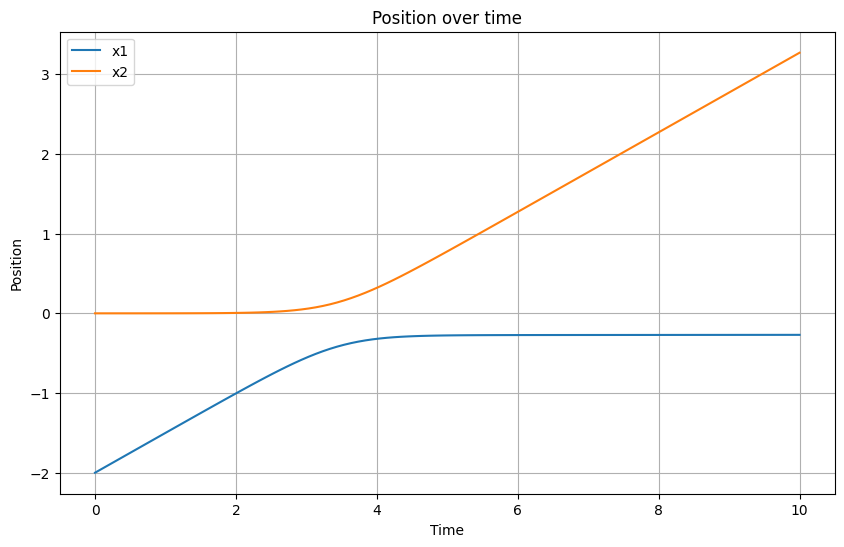

In [ ]:
solution[["x1", "x2"]].plot(figsize=(10, 6), xlabel='Time', ylabel='Position', title='Position over time', grid=True);

<Axes: title={'center': 'Velocity over time'}, xlabel='Time', ylabel='Velocity'>

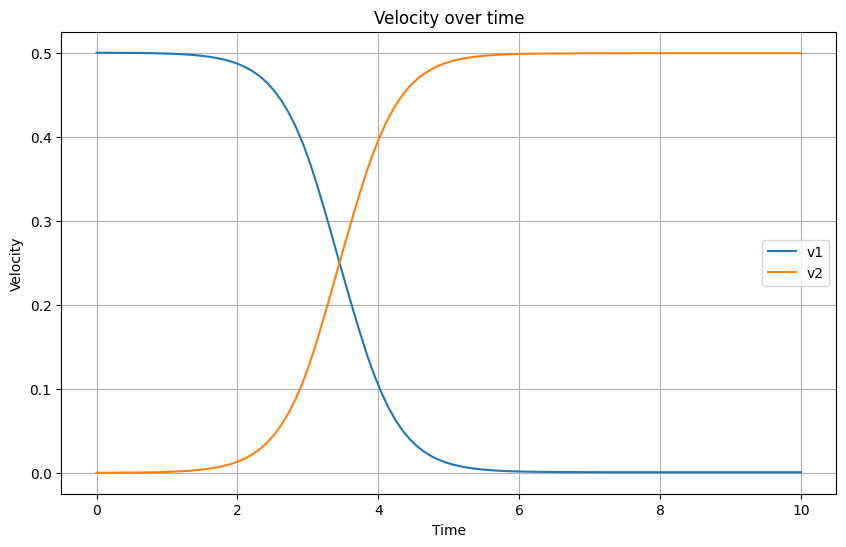

In [ ]:
solution[["v1", "v2"]].plot(figsize=(10, 6), xlabel='Time', ylabel='Velocity', title='Velocity over time', grid=True)